In [1]:
# Import the dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy
# Import the rquests library
import requests

# Import the API key
from config import weather_api_key

# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [2]:
# Create a set of random latutude and londitude combinations
lats = np.random.uniform(-90, 90, size=1500)
lngs = np.random.uniform(-180, 180, size=1500)

lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list
coordinates = list(lat_lngs)

In [4]:
# Create a list for holding the cities
cities = []
# Identify the nearest city for each latitude and longitude combination
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
        
# Print the city count to confirm sufficient count
len(cities)

583

In [5]:
url = "https://api.openweathermap.org/data/2.5/weather?units=imperial&appid=" + weather_api_key

In [6]:
# Create an empty list to hold the weather data
city_data = []
# Print the beginnning of the logging
print("Beginning Data Retrieval    ")
print("----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list
for i, city in enumerate(cities):
    
    # Group cities in set of 50 for logging purposes
    if (i % 50 == 0 and i >=50):
        set_count += 1
        record_count = 1
        time.sleep(60)
        
    # Create endpoint URL for each city
    city_url = url + "&q=" + city.replace(" ","+")
    
    # Log the URL, record, and set numbers and the city
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    
    # Add 1 to the record count
    record_count += 1
    
    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        # Parse out the needed data
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard
        city_date = datetime.utcfromtimestamp(city_weather['dt']).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into the city_data list
        city_data.append({"City": city.title(),
                         "Lat": city_lat,
                         "Lng": city_lng,
                         "Max Temp": city_max_temp,
                         "Humidity": city_humidity,
                         "Cloudiness": city_clouds,
                         "Wind Speed": city_wind,
                         "Country": city_country,
                         "Date": city_date})
        
# If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
    
# Indicate the Data Loading is complete
print("---------------------------")
print("Data Retrieval Complete    ")
print("---------------------------")

Beginning Data Retrieval    
----------------------------
Processing Record 1 of Set 1 | ushuaia
Processing Record 2 of Set 1 | manta
Processing Record 3 of Set 1 | nikolskoye
Processing Record 4 of Set 1 | port blair
Processing Record 5 of Set 1 | esperance
Processing Record 6 of Set 1 | busselton
Processing Record 7 of Set 1 | coquimbo
Processing Record 8 of Set 1 | morazan
Processing Record 9 of Set 1 | batagay-alyta
Processing Record 10 of Set 1 | airai
Processing Record 11 of Set 1 | punta arenas
Processing Record 12 of Set 1 | tshikapa
Processing Record 13 of Set 1 | luderitz
Processing Record 14 of Set 1 | kattivakkam
Processing Record 15 of Set 1 | vaini
Processing Record 16 of Set 1 | ust-ishim
Processing Record 17 of Set 1 | gayeri
Processing Record 18 of Set 1 | alofi
Processing Record 19 of Set 1 | itoman
Processing Record 20 of Set 1 | talnakh
Processing Record 21 of Set 1 | monrovia
Processing Record 22 of Set 1 | hornepayne
Processing Record 23 of Set 1 | illoqqortoormiu

City not found. Skipping...
Processing Record 40 of Set 4 | utete
Processing Record 41 of Set 4 | camacha
Processing Record 42 of Set 4 | shiyan
Processing Record 43 of Set 4 | digapahandi
Processing Record 44 of Set 4 | cootamundra
Processing Record 45 of Set 4 | bengkulu
Processing Record 46 of Set 4 | cairns
Processing Record 47 of Set 4 | shache
Processing Record 48 of Set 4 | bambous virieux
Processing Record 49 of Set 4 | mayumba
Processing Record 50 of Set 4 | penzance
Processing Record 1 of Set 5 | utiroa
City not found. Skipping...
Processing Record 2 of Set 5 | nizhneyansk
City not found. Skipping...
Processing Record 3 of Set 5 | arzgir
Processing Record 4 of Set 5 | torbay
Processing Record 5 of Set 5 | chardara
Processing Record 6 of Set 5 | pokrovsk-uralskiy
City not found. Skipping...
Processing Record 7 of Set 5 | kaa-khem
Processing Record 8 of Set 5 | taga
Processing Record 9 of Set 5 | luanda
Processing Record 10 of Set 5 | vardo
Processing Record 11 of Set 5 | santi

Processing Record 25 of Set 8 | hushitai
Processing Record 26 of Set 8 | rapid valley
Processing Record 27 of Set 8 | bathsheba
Processing Record 28 of Set 8 | ilkal
Processing Record 29 of Set 8 | viedma
Processing Record 30 of Set 8 | okha
Processing Record 31 of Set 8 | preeceville
Processing Record 32 of Set 8 | quatre cocos
Processing Record 33 of Set 8 | marcona
City not found. Skipping...
Processing Record 34 of Set 8 | samarai
Processing Record 35 of Set 8 | shellbrook
Processing Record 36 of Set 8 | pauini
Processing Record 37 of Set 8 | atyuryevo
City not found. Skipping...
Processing Record 38 of Set 8 | matamoros
Processing Record 39 of Set 8 | bahia blanca
Processing Record 40 of Set 8 | miri
Processing Record 41 of Set 8 | mullovka
Processing Record 42 of Set 8 | isla vista
Processing Record 43 of Set 8 | lagoa
Processing Record 44 of Set 8 | mingguang
Processing Record 45 of Set 8 | severo-kurilsk
Processing Record 46 of Set 8 | chuguyevka
Processing Record 47 of Set 8 |

Processing Record 15 of Set 12 | saravan
Processing Record 16 of Set 12 | skibbereen
Processing Record 17 of Set 12 | karkaralinsk
City not found. Skipping...
Processing Record 18 of Set 12 | vetapalem
Processing Record 19 of Set 12 | lasa
Processing Record 20 of Set 12 | pangai
Processing Record 21 of Set 12 | bubaque
Processing Record 22 of Set 12 | nago
Processing Record 23 of Set 12 | dujuma
City not found. Skipping...
Processing Record 24 of Set 12 | gold coast
Processing Record 25 of Set 12 | kerteh
City not found. Skipping...
Processing Record 26 of Set 12 | samalaeulu
City not found. Skipping...
Processing Record 27 of Set 12 | baijiantan
Processing Record 28 of Set 12 | bandarbeyla
Processing Record 29 of Set 12 | qaqortoq
Processing Record 30 of Set 12 | ancud
Processing Record 31 of Set 12 | puerto madryn
Processing Record 32 of Set 12 | auki
Processing Record 33 of Set 12 | saint-georges
Processing Record 34 of Set 12 | muros
Processing Record 35 of Set 12 | jackson
Process

In [7]:
num_cities = len(city_data)
num_cities

569

In [8]:
# Convert the array of dictionaries to a pandas dataframe
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Ushuaia,-54.8000,-68.3000,37.06,81,75,10.36,AR,2022-04-27 18:14:34
1,Manta,-0.9500,-80.7333,83.98,74,40,9.22,EC,2022-04-27 18:14:35
2,Nikolskoye,59.7035,30.7861,33.80,67,99,3.20,RU,2022-04-27 18:14:36
3,Port Blair,11.6667,92.7500,83.62,77,98,0.74,IN,2022-04-27 18:11:47
4,Esperance,-33.8667,121.9000,58.84,86,76,12.97,AU,2022-04-27 18:14:19
5,Busselton,-33.6500,115.3333,60.64,73,88,12.95,AU,2022-04-27 18:12:45
6,Coquimbo,-29.9533,-71.3436,64.13,77,20,14.97,CL,2022-04-27 18:14:38
7,Morazan,15.3167,-87.6000,87.57,68,65,5.14,HN,2022-04-27 18:14:39
8,Batagay-Alyta,67.8006,130.4114,3.29,95,100,4.63,RU,2022-04-27 18:14:40
9,Airai,-8.9266,125.4092,59.86,94,25,0.83,TL,2022-04-27 18:13:37


In [9]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Ushuaia,AR,2022-04-27 18:14:34,-54.8000,-68.3000,37.06,81,75,10.36
1,Manta,EC,2022-04-27 18:14:35,-0.9500,-80.7333,83.98,74,40,9.22
2,Nikolskoye,RU,2022-04-27 18:14:36,59.7035,30.7861,33.80,67,99,3.20
3,Port Blair,IN,2022-04-27 18:11:47,11.6667,92.7500,83.62,77,98,0.74
4,Esperance,AU,2022-04-27 18:14:19,-33.8667,121.9000,58.84,86,76,12.97
5,Busselton,AU,2022-04-27 18:12:45,-33.6500,115.3333,60.64,73,88,12.95
6,Coquimbo,CL,2022-04-27 18:14:38,-29.9533,-71.3436,64.13,77,20,14.97
7,Morazan,HN,2022-04-27 18:14:39,15.3167,-87.6000,87.57,68,65,5.14
8,Batagay-Alyta,RU,2022-04-27 18:14:40,67.8006,130.4114,3.29,95,100,4.63
9,Airai,TL,2022-04-27 18:13:37,-8.9266,125.4092,59.86,94,25,0.83


In [10]:
# Create the output file (CSV)
output_data_file = "weather_data/cities.csv"
# Export the City Data into a csv
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [11]:
# Extract relevant fields from the dataFrame for plotting
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

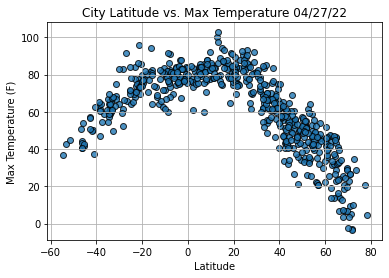

In [12]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature
plt.scatter(lats,
           max_temps, 
           edgecolor = "k",
           linewidths = 1,
           marker = "o",
           alpha = 0.8,
           label = "Cities")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Max Temperature "+time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("weather_data/Fig1.png")

# Show plot
plt.show()

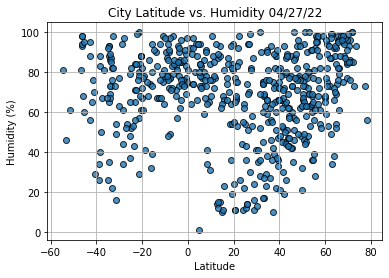

In [13]:
# Build the scatter plot for latitude vs. humidity
plt.scatter(lats,
           humidity, 
           edgecolor = "k",
           linewidths = 1,
           marker = "o",
           alpha = 0.8,
           label = "Cities")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Humidity "+time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("weather_data/Fig2.png")

# Show plot
plt.show()

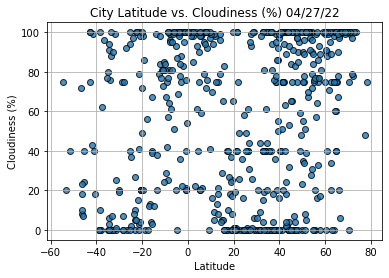

In [14]:
# Build the scatter plot for latitude vs. Cloudiness
plt.scatter(lats,
           cloudiness, 
           edgecolor = "k",
           linewidths = 1,
           marker = "o",
           alpha = 0.8,
           label = "Cities")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Cloudiness (%) "+time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("weather_data/Fig3.png")

# Show plot
plt.show()

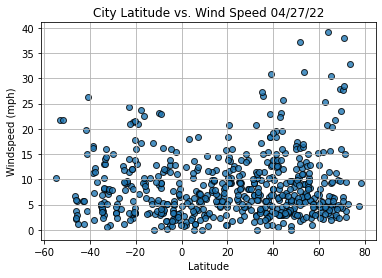

In [15]:
# Build the scatter plot for latitude vs. wind speed
plt.scatter(lats,
           wind_speed, 
           edgecolor = "k",
           linewidths = 1,
           marker = "o",
           alpha = 0.8,
           label = "Cities")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Wind Speed "+time.strftime("%x"))
plt.ylabel("Windspeed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("weather_data/Fig4.png")

# Show plot
plt.show()

In [16]:
# import line regress
from scipy.stats import linregress 

# Create a function to create perform linear regression on the weather data and plot a regression line and the equation with the data
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
    # Run regression on hemisphere weather data
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    print(f"r-value is: {r_value:.4f}")
    # Calculate the regression line "y values" from the slope and intercept
    regress_values = x_values * slope + intercept
    # Get the equation of the line
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line
    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_values,"r")
    # Annotate the text for the line equation
    plt.annotate(line_eq, text_coordinates, fontsize=15, color = "red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [17]:
index13 = city_data_df.loc[13]
index13

City                  Kattivakkam
Country                        IN
Date          2022-04-27 18:14:44
Lat                       13.2167
Lng                       80.3167
Max Temp                    86.09
Humidity                       87
Cloudiness                     18
Wind Speed                   9.86
Name: 13, dtype: object

In [18]:
city_data_df.loc[city_data_df["Lat"] >= 0].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
2,Nikolskoye,RU,2022-04-27 18:14:36,59.7035,30.7861,33.80,67,99,3.20
3,Port Blair,IN,2022-04-27 18:11:47,11.6667,92.7500,83.62,77,98,0.74
7,Morazan,HN,2022-04-27 18:14:39,15.3167,-87.6000,87.57,68,65,5.14
8,Batagay-Alyta,RU,2022-04-27 18:14:40,67.8006,130.4114,3.29,95,100,4.63
13,Kattivakkam,IN,2022-04-27 18:14:44,13.2167,80.3167,86.09,87,18,9.86


In [19]:
# Create northern and southern hemisphere dataframes
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

r-value is: -0.8767


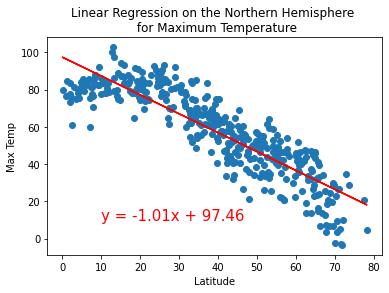

In [20]:
# Linear regression on the northern hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function
plot_linear_regression(x_values, y_values,
                      "Linear Regression on the Northern Hemisphere \n for Maximum Temperature", "Max Temp", (10,10))

r-value is: 0.7735


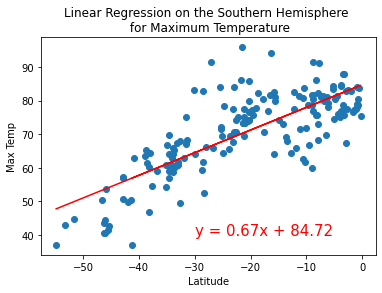

In [21]:
# Linear regression on the southern hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function
plot_linear_regression(x_values, y_values,
                      "Linear Regression on the Southern Hemisphere \n for Maximum Temperature", "Max Temp", (-30,40))

r-value is: 0.1929


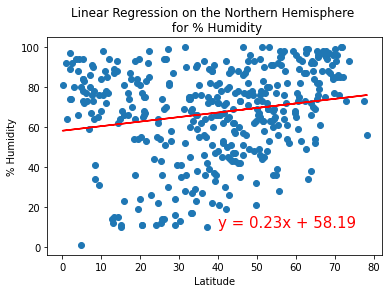

In [22]:
# Linear regression on the northern hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function
plot_linear_regression(x_values, y_values,
                      "Linear Regression on the Northern Hemisphere \n for % Humidity", "% Humidity", (40,10))

r-value is: 0.2196


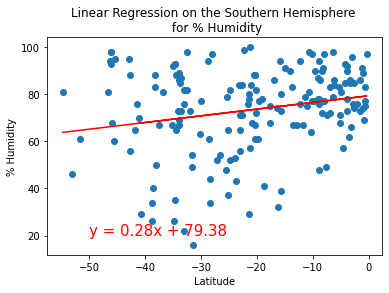

In [23]:
# Linear regression on the southern hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function
plot_linear_regression(x_values, y_values,
                      "Linear Regression on the Southern Hemisphere \n for % Humidity", "% Humidity", (-50,20))

r-value is: 0.2096


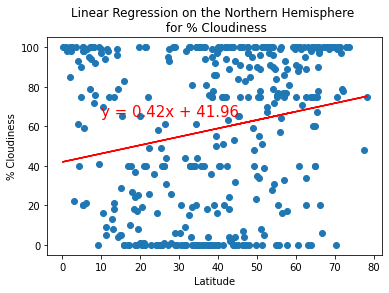

In [24]:
# Linear regression on the northern hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function
plot_linear_regression(x_values, y_values,
                      "Linear Regression on the Northern Hemisphere \n for % Cloudiness", "% Cloudiness", (10,65))

r-value is: 0.3613


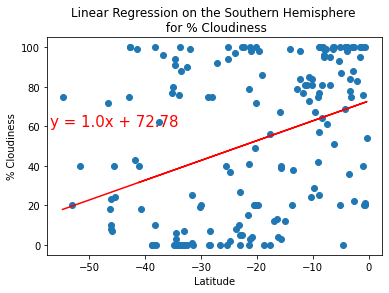

In [25]:
# Linear regression on the southern hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function
plot_linear_regression(x_values, y_values,
                      "Linear Regression on the Southern Hemisphere \n for % Cloudiness", "% Cloudiness", (-57,60))

r-value is: 0.1537


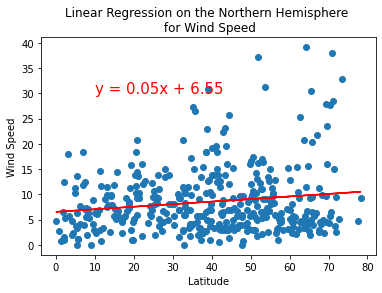

In [26]:
# Linear regression on the northern hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function
plot_linear_regression(x_values, y_values,
                      "Linear Regression on the Northern Hemisphere \n for Wind Speed", "Wind Speed", (10,30))

r-value is: -0.1211


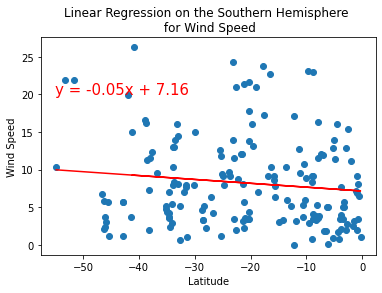

In [27]:
# Linear regression on the southern hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function
plot_linear_regression(x_values, y_values,
                      "Linear Regression on the Southern Hemisphere \n for Wind Speed", "Wind Speed", (-55,20))